<a href="https://colab.research.google.com/github/luanjesus/metodo-simulacao-monte-carlo/blob/main/estimando_valor_pi_smc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicando Simulações de Monte Carlo para estimar o valor de π


Iremos utilizar o cálculo para a estimativa da constante π, pois, este é um valor conhecido. Com isso, o entendimento da aplicação do MSMC é facilitado, além de ser demonstrado que a técnica realmente funciona.

$π$ é um valor irracional e que tende ao infinito (3,1415926...), possui o valor aproximado 3,14. Este valor pode ser gerado através da área de uma circunferência. Tomando como base algumas definições, que serão apresentados na seqüência, é possível definir uma função das distribuições de probabilidade  para se calcular uma aproximação de $π$ através da SMC. 

## Definições para a FDP

* Área da Circunferência: $A= πr^2$, sendo r o raio;
* Quando o raio é unitário, isto é, quando $r=1$, a área é igual ao valor da
constante $π$;
* Os pontos aleatórios devem estar dentro de um vetor $P(x,y)$;
* A FDP deve verificar se os pontos estão dentro ou fora da circunferência;
* Para verificar se um ponto está dentro da circunferência usa-se $x^2+y^2= r^2$;
* Se o raio for unitário; então, $x^2+y^2= 1$;
* Para facilitar a verificação dos valores que estão dentro ou fora da
circunferência, devemos inseri-la dentro de outra figura geométrica. Neste caso,
será utilizado o quadro, pois é a figura mais fácil de trabalhar.
* **Dentro do círculo:** $P(x,y) = P\{x^2+y^2 ≤ 1\}$;
* **Fora do círculo:** $P(x,y) = \frac{π}{4}$.

Sendo assim, ao gerar vários pontos aleatórios no quadrado, a proporcionalidade
dos valores que caem dentro do círculo será π/4. Como x e y são variáveis independentes e distribuídos uniformemente no intervalo (-1,1), sua função das distribuições probabilísticas pode ser considerada como:




> $P(x,y) = P(x) . P(y)$
>
>$P(x,y) = \frac{1}{2} * \frac{1}{2} = \frac{1}{4}$
>
>**Intervalo de x:** $-1\le x\le 1$ (disperção no eixo x)
>
>**Intervalo de y:** $-1\le y\le 1$ (disperção no eixo y)

Como $P(x,y)$ é constante no quadrado, segue da definição que
$(x,y)$ é distribuída uniformemente no quadrado. E tomando como base que o cálculo de um valor esperado $θ$ é igual a $E$. Então,

> $E(x,y) = P\{x^2+y^2 \le 1\} = \frac{π}{4}$

>$π = P\{x^2+y^2 \le 1 \} * 4$

## Implementação do Código

1. Imports das bibliotecas
2. Funções 
    * **plotar_dispersao**: Gera um gráfico scatter com as distribuições dos pontos que estão dentro e fora da circunferência.
    * **estimar_pi**: Gera a simulação de Monte Carlo com a quantidade de vezes informada. 
    * **gerar_tabela_valores_pi**: Gera uma tabela com a relação das simulações, valores estimados e taxa de erro do valor real.


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
def plotar_dispersao(x,y,dentro_circulo):
    
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(121)
    
    col=[]
    for i in range(0,len(x)):
        if dentro_circulo[i] == True:
            col.append('red')
        else:
            col.append('blue')
    for i in range(len(x)):
        plt.scatter(x[i],y[i],color=col[i],s=10, linewidth=0)
    ax1.set_aspect(1./ax1.get_data_ratio()) 
    plt.show()


def estimar_pi(numero_simulacaoes, dispersao):
    pi_real = 3.141592
    x = np.random.uniform(low=-dispersao, high=dispersao, size=(numero_simulacaoes,))
    y = np.random.uniform(low=-dispersao, high=dispersao, size=(numero_simulacaoes,))

    dentro_circulo = x**2 + y**2 <= dispersao**2
    pi_monte_carlo = (sum(dentro_circulo)/numero_simulacaoes)*4
    
    diferenca = np.absolute(pi_monte_carlo - pi_real)
    if(numero_simulacaoes == 1000):
      print('Dispersão dos pontos em uma simulação com 1000 repetições')
      plotar_dispersao(x,y,dentro_circulo)

    return {'Simulacoes': numero_simulacaoes,'Valor Estimado':pi_monte_carlo,'Taxa de Acerto % (3,14)':(1-diferenca)*100}

def gerar_tabela_valores_pi(lista_simulacao):
  estimados = []
  for i in lista_simulacao:
    estimados.append(estimar_pi(i,1))
  df_estimados = pd.DataFrame(estimados)
  return df_estimados

In [137]:
lista_simulacao = [10, 100, 1000, 10000, 100000]


Dispersão dos pontos em uma simulação com 1000 repetições


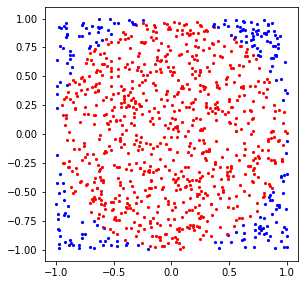

,Simulacoes,Valor Estimado,"Taxa de Acerto % (3,14)"
0,10,2.80000,65.8408
1,100,2.88000,73.8408
2,1000,3.11200,97.0408
3,10000,3.15760,98.3992
4,100000,3.14104,99.9448


In [138]:
df_estimados = gerar_tabela_valores_pi(lista_simulacao)
df_estimados